# Summary

## Findings
* Most hosts respond within an hour
* Most hosts are neither verified or superhosts
* Bed type, requires license, and host has a profile pic are not a useful field
* There are a handful of features that are correlated with price
* A few features are highly correlated with each other
* The target variable is skewed and will need to be log transformed 

## To-Do
* Log transform target
* Remove correlated features
* Remove non useful features

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Findings</a></span></li><li><span><a href="#To-Do" data-toc-modified-id="To-Do-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>To-Do</a></span></li></ul></li><li><span><a href="#Histograms-and-Bar-Charts" data-toc-modified-id="Histograms-and-Bar-Charts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histograms and Bar Charts</a></span></li><li><span><a href="#Kernel-Density-Estimate-Plots" data-toc-modified-id="Kernel-Density-Estimate-Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kernel Density Estimate Plots</a></span><ul class="toc-item"><li><span><a href="#All-columns" data-toc-modified-id="All-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All columns</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Overall-Correlations" data-toc-modified-id="Overall-Correlations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall Correlations</a></span></li><li><span><a href="#Top-10-Correlations-with-Target" data-toc-modified-id="Top-10-Correlations-with-Target-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Top 10 Correlations with Target</a></span></li><li><span><a href="#Absolute-Correlated-Features" data-toc-modified-id="Absolute-Correlated-Features-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Absolute Correlated Features</a></span></li></ul></li><li><span><a href="#Distribution-Analysis" data-toc-modified-id="Distribution-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Distribution Analysis</a></span><ul class="toc-item"><li><span><a href="#Target-Distribution" data-toc-modified-id="Target-Distribution-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Target Distribution</a></span></li><li><span><a href="#Empirical-Cumulative-Distribution-Function-(ECDF)" data-toc-modified-id="Empirical-Cumulative-Distribution-Function-(ECDF)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Empirical Cumulative Distribution Function (ECDF)</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Background</a></span></li></ul></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="#Target-Distribution-by-Selected-Categories" data-toc-modified-id="Target-Distribution-by-Selected-Categories-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Target Distribution by Selected Categories</a></span></li></ul></li></ul></div>

In [1]:
# Import needed libraries
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.plotting import ecdf
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
# Set the style of plots
plt.style.use('fivethirtyeight')


# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('data/listings_cleaned.pkl')

X = df.drop(columns='price',axis=1)
y = df.price
num_df = df.select_dtypes(np.number)

df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,reviews_per_month
0,a few days or more,25.0,False,1.0,True,False,93510,House,Entire home/apt,10,7.0,5.0,5.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Pool,K...",3000.0,"$2,000.00",200.0,1,0.0,1,1125,27,53,82,352,0,NaN,False,True,strict,NaN
1,within an hour,100.0,True,1.0,True,False,93550,House,Private room,2,1.0,1.0,1.0,Real Bed,{},50.0,NaN,NaN,1,0.0,1,1125,29,45,75,350,33,93.0,False,False,flexible,1.91
2,within an hour,100.0,True,1.0,True,True,93510,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",""Wheel...",55.0,NaN,NaN,1,10.0,1,1125,18,43,73,348,14,100.0,False,False,flexible,1.72
3,within an hour,100.0,True,1.0,True,False,93510,Other,Entire home/apt,6,1.0,1.0,3.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Poo...",150.0,NaN,35.0,1,0.0,1,2,3,17,30,87,22,100.0,False,True,flexible,2.12
4,NaN,NaN,False,1.0,True,True,90007,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free pa...",30.0,NaN,5.0,1,10.0,1,90,0,0,0,0,3,93.0,False,False,flexible,0.18


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30854 entries, 0 to 31252
Data columns (total 32 columns):
host_response_time        25405 non-null category
host_response_rate        25405 non-null float64
host_is_superhost         30854 non-null bool
host_listings_count       30840 non-null float32
host_has_profile_pic      30854 non-null bool
host_identity_verified    30854 non-null bool
zipcode                   30854 non-null object
property_type             30854 non-null category
room_type                 30854 non-null category
accommodates              30854 non-null int64
bathrooms                 30759 non-null float32
bedrooms                  30822 non-null float32
beds                      30801 non-null float32
bed_type                  30854 non-null category
amenities                 30854 non-null category
price                     30854 non-null float64
security_deposit          16660 non-null category
cleaning_fee              23974 non-null float64
guests_included

In [3]:
df.describe()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
count,25405.000000,30840.000000,30854.000000,30759.000000,30822.000000,30801.000000,30854.000000,23974.000000,30854.000000,30854.000000,30854.000000,3.085400e+04,30854.000000,30854.000000,30854.000000,30854.000000,30854.000000,23470.000000,23765.000000
mean,93.903798,5.204248,3.427173,1.380799,1.349393,1.889776,179.569359,75.605781,1.720328,13.416640,3.213230,2.095643e+05,14.161405,31.351332,50.043074,199.925131,21.000194,94.206688,1.860480
std,17.525204,24.291004,2.481787,0.828218,0.991310,1.524403,416.818056,73.288500,1.504299,23.445962,8.207322,2.117486e+07,11.731739,22.755870,33.696971,138.448360,38.263256,8.013208,2.024126
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.020000
25%,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,69.000000,30.000000,1.000000,0.000000,1.000000,3.000000e+01,1.000000,8.000000,17.000000,69.000000,1.000000,92.000000,0.410000
50%,100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,100.000000,55.000000,1.000000,0.000000,2.000000,1.125000e+03,13.000000,32.000000,56.000000,211.000000,6.000000,96.000000,1.130000
75%,100.000000,4.000000,4.000000,1.500000,2.000000,2.000000,170.000000,100.000000,2.000000,20.000000,3.000000,1.125000e+03,27.000000,55.000000,84.000000,341.000000,24.000000,100.000000,2.740000
max,100.000000,855.000000,16.000000,8.000000,10.000000,16.000000,10000.000000,1000.000000,16.000000,300.000000,365.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,605.000000,100.000000,90.000000


# Histograms and Bar Charts

The following columns had too many unique values to plot:['host_listings_count', 'zipcode', 'property_type', 'amenities', 'security_deposit', 'review_scores_rating', 'reviews_per_month']


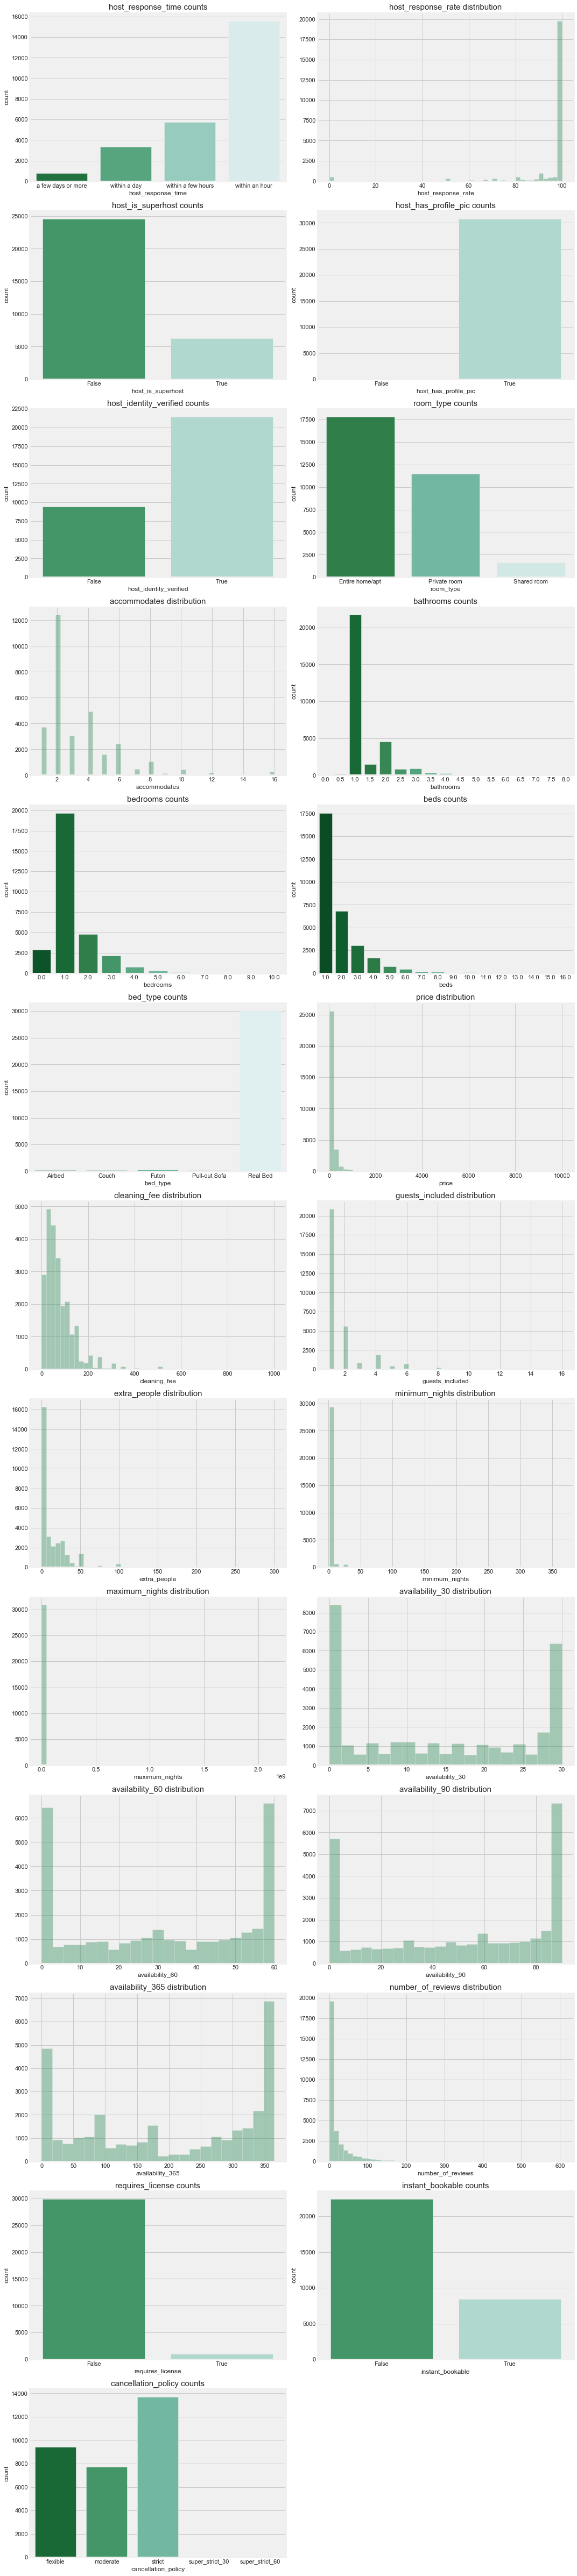

In [4]:
# Identify columns too large to plot
missed = []
for col in df.columns:
    if (df[col].dtypes == np.float or df[col].dtypes == np.int64 or df[col].nunique() < 20):
        pass
    else:
        missed.append(col)

# Plot charts
to_plot = df.drop(columns=missed, axis=1)
number_of_columns = 2
number_of_rows = to_plot.shape[1]-1/number_of_columns
plt.figure(figsize=(15, 5*number_of_rows))

for i, col in zip(range(0, to_plot.shape[1]), to_plot.columns):
    plt.subplot(number_of_rows, number_of_columns, i+1)

    if (to_plot[col].dtypes == np.float or to_plot[col].dtypes == np.int64):

        if (to_plot[col].nunique() == 2):
            sns.countplot(to_plot[col], palette="BuGn_r").set_title(
                f'{col} counts', fontsize=15)
        else:
            df2 = to_plot[col].dropna(axis=0)
            sns.distplot(df2, kde=False, color='seagreen').set_title(
                f'{col} distribution', fontsize=15)
    else:
        sns.countplot(to_plot[col], palette="BuGn_r").set_title(
            f'{col} counts', fontsize=15)

print(f'The following columns had too many unique values to plot:{missed}')
plt.tight_layout()

# Kernel Density Estimate Plots

## All columns

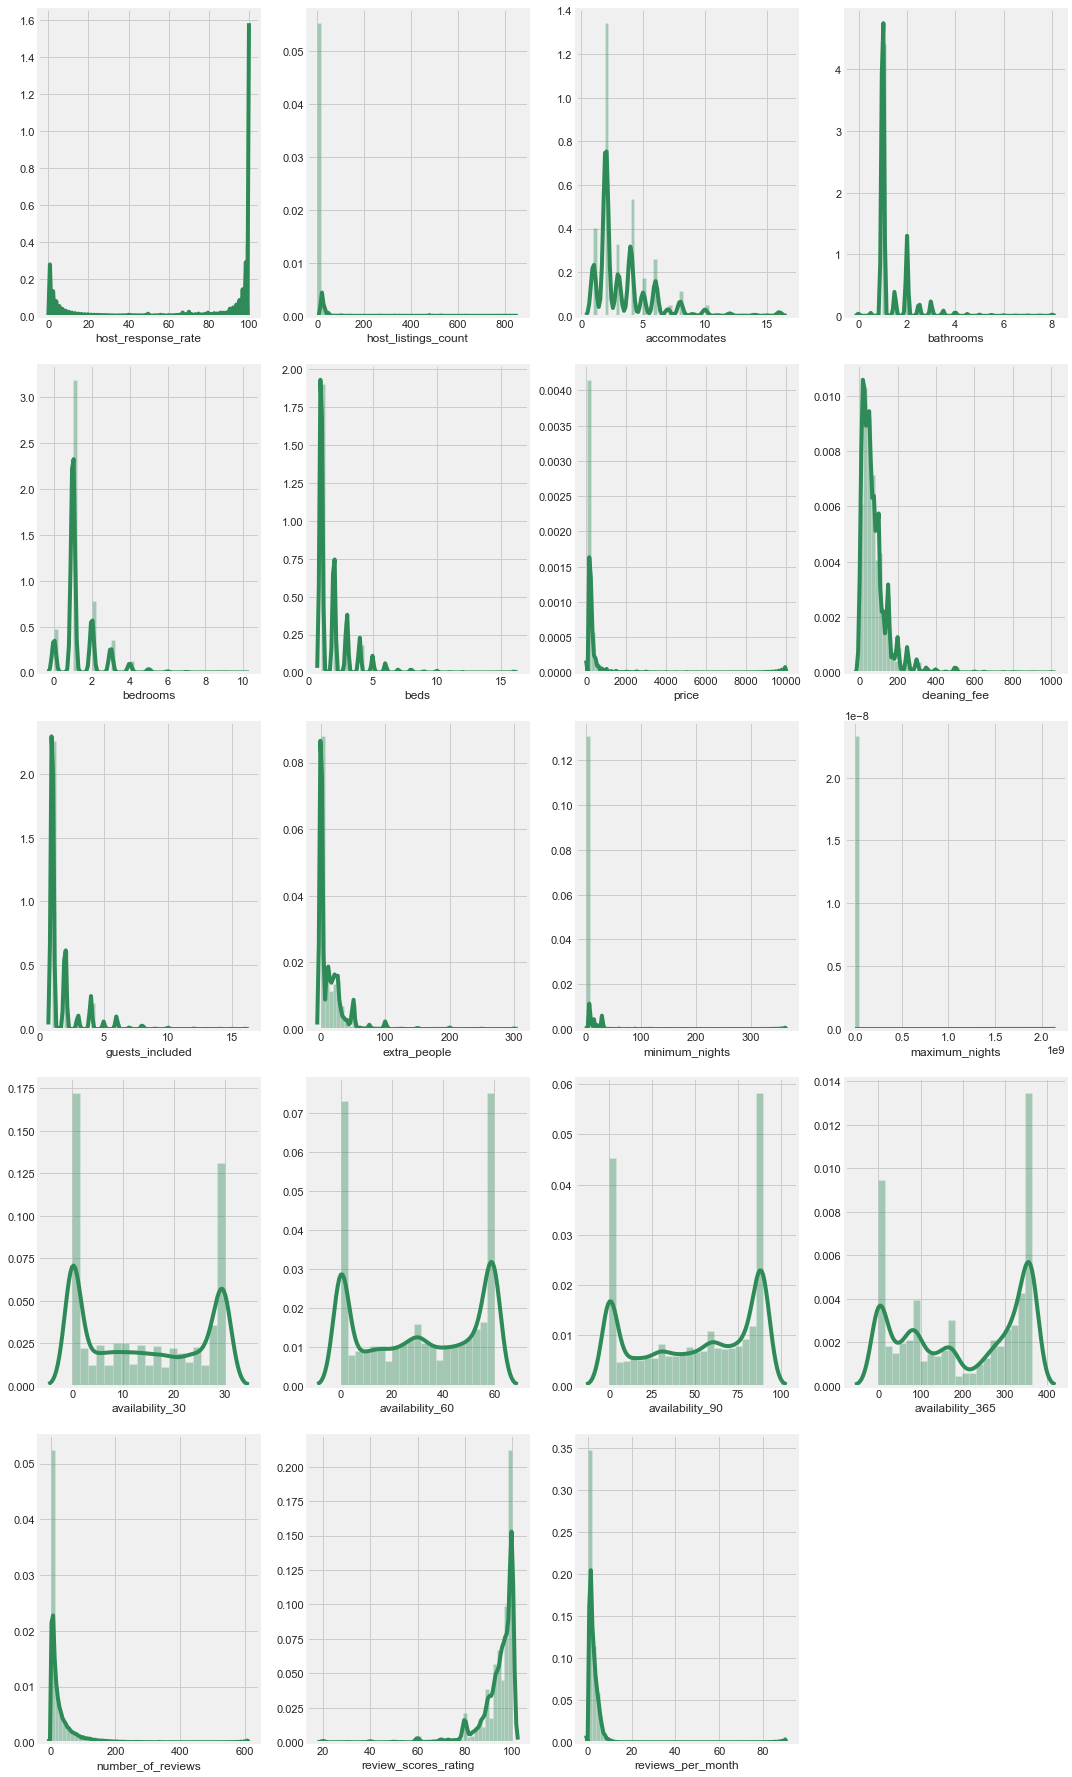

In [5]:
l = num_df.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(15,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(num_df[l[i]].dropna(),kde=True,color='seagreen') 
    plt.tight_layout()

# Correlations

## Overall Correlations

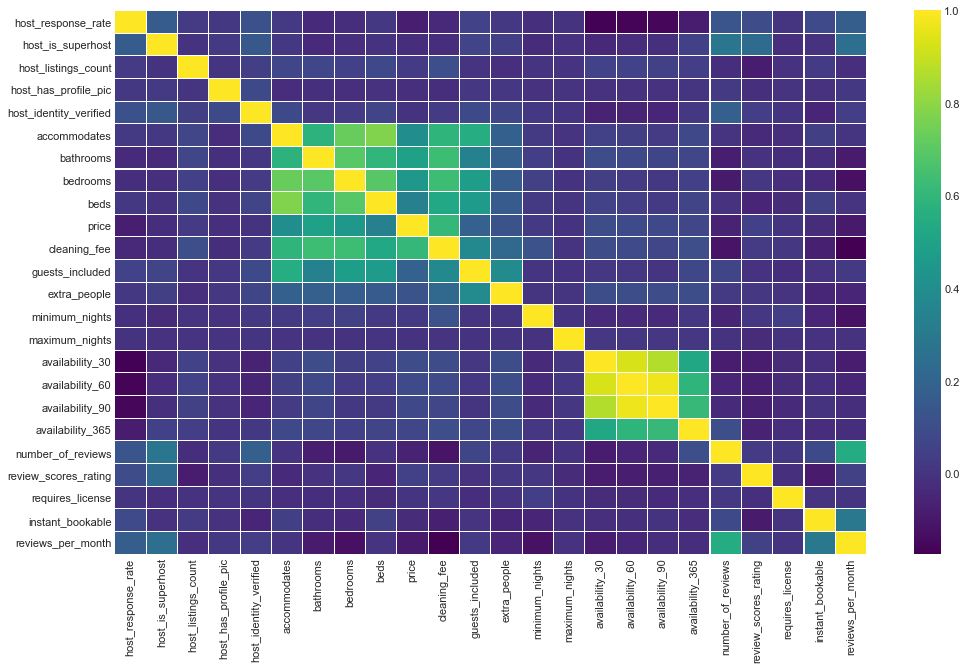

In [6]:
#Quality correlation matrix
cols = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cols, annot=False, cmap = 'viridis', linewidths=.1)

## Top 10 Correlations with Target

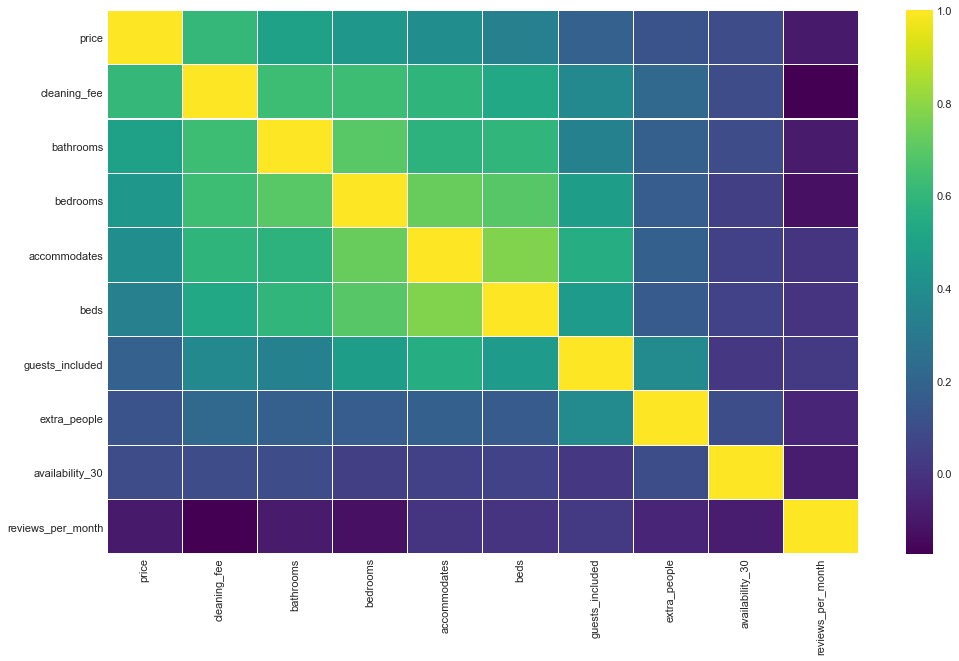

In [7]:
#Quality correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().abs().nlargest(k, 'price')['price'].index
cm = df[cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=False, cmap = 'viridis', linewidths=.1)

Text(0.5, 1.0, 'Correlated with Target')

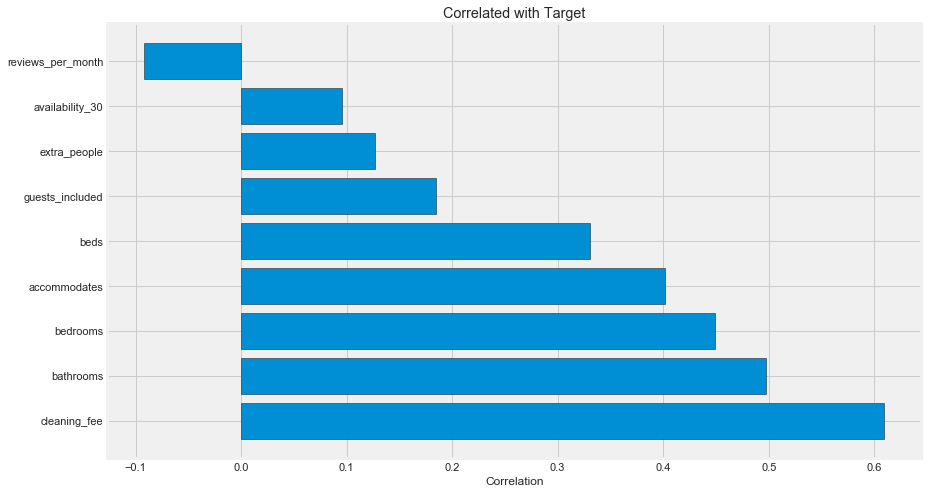

In [8]:
# Chart out top correlated features
plt.figure(figsize = (13, 8))
ax = plt.subplot()

# Need to reverse the index to plot most important on top
ax.barh(cm.index[1:],cm['price'][1:], edgecolor = 'k')
plt.xlabel('Correlation'); plt.title('Correlated with Target')

## Absolute Correlated Features

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(num_df, 15))

Top Absolute Correlations
availability_60  availability_90     0.969904
availability_30  availability_60     0.928666
                 availability_90     0.863659
accommodates     beds                0.775490
                 bedrooms            0.727786
bathrooms        bedrooms            0.696067
bedrooms         beds                0.692562
bathrooms        cleaning_fee        0.632492
bedrooms         cleaning_fee        0.632017
availability_90  availability_365    0.614435
price            cleaning_fee        0.609720
bathrooms        beds                0.594773
availability_60  availability_365    0.591909
accommodates     cleaning_fee        0.587945
                 bathrooms           0.578304
dtype: float64


**I will remove availability_60 and availability_90 in pre-processing due to the high correlation**

# Distribution Analysis

## Target Distribution

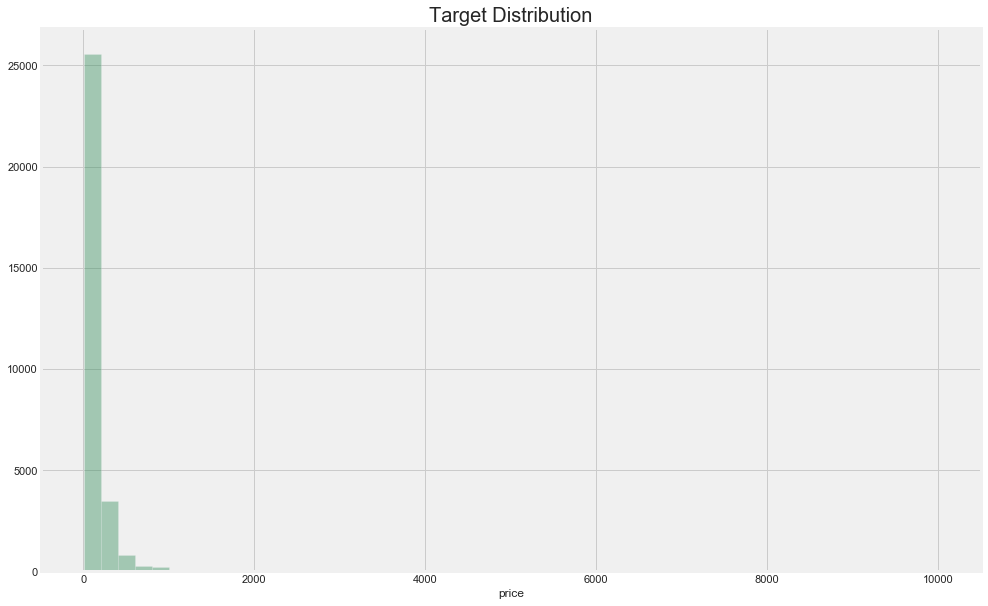

In [10]:
if len(y.unique()) == 2:
    f, axes = plt.subplots(figsize=(10, 5))
    sns.countplot(y, palette="BuGn_r").set_title('Target Distribution', fontsize=20)
else:
    f, axes = plt.subplots(figsize=(15, 10))
    sns.distplot(y,kde=False,color='seagreen').set_title('Target Distribution', fontsize=20)

 ## Empirical Cumulative Distribution Function (ECDF)

### Background

In statistics, an empirical distribution function is the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value.

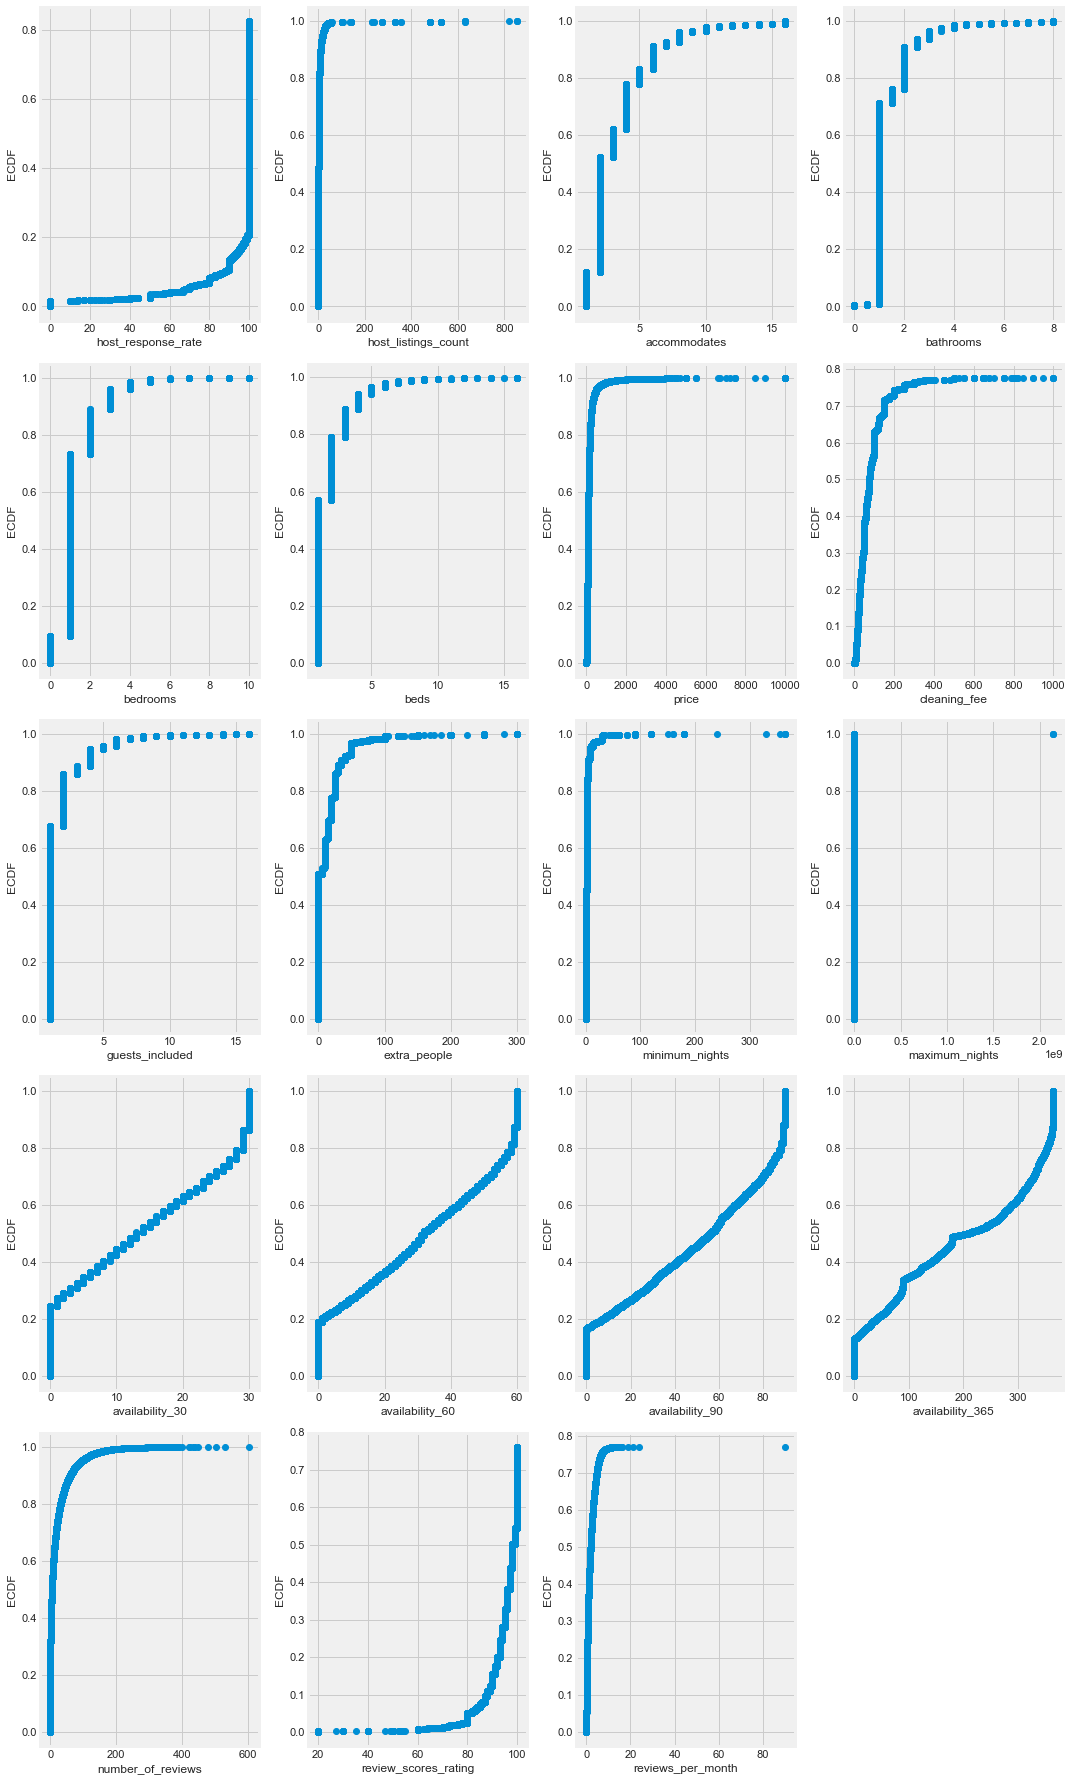

In [11]:
l = num_df.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(15,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    ecdf(num_df[l[i]],x_label=l[i])
    plt.tight_layout()

## Boxplots

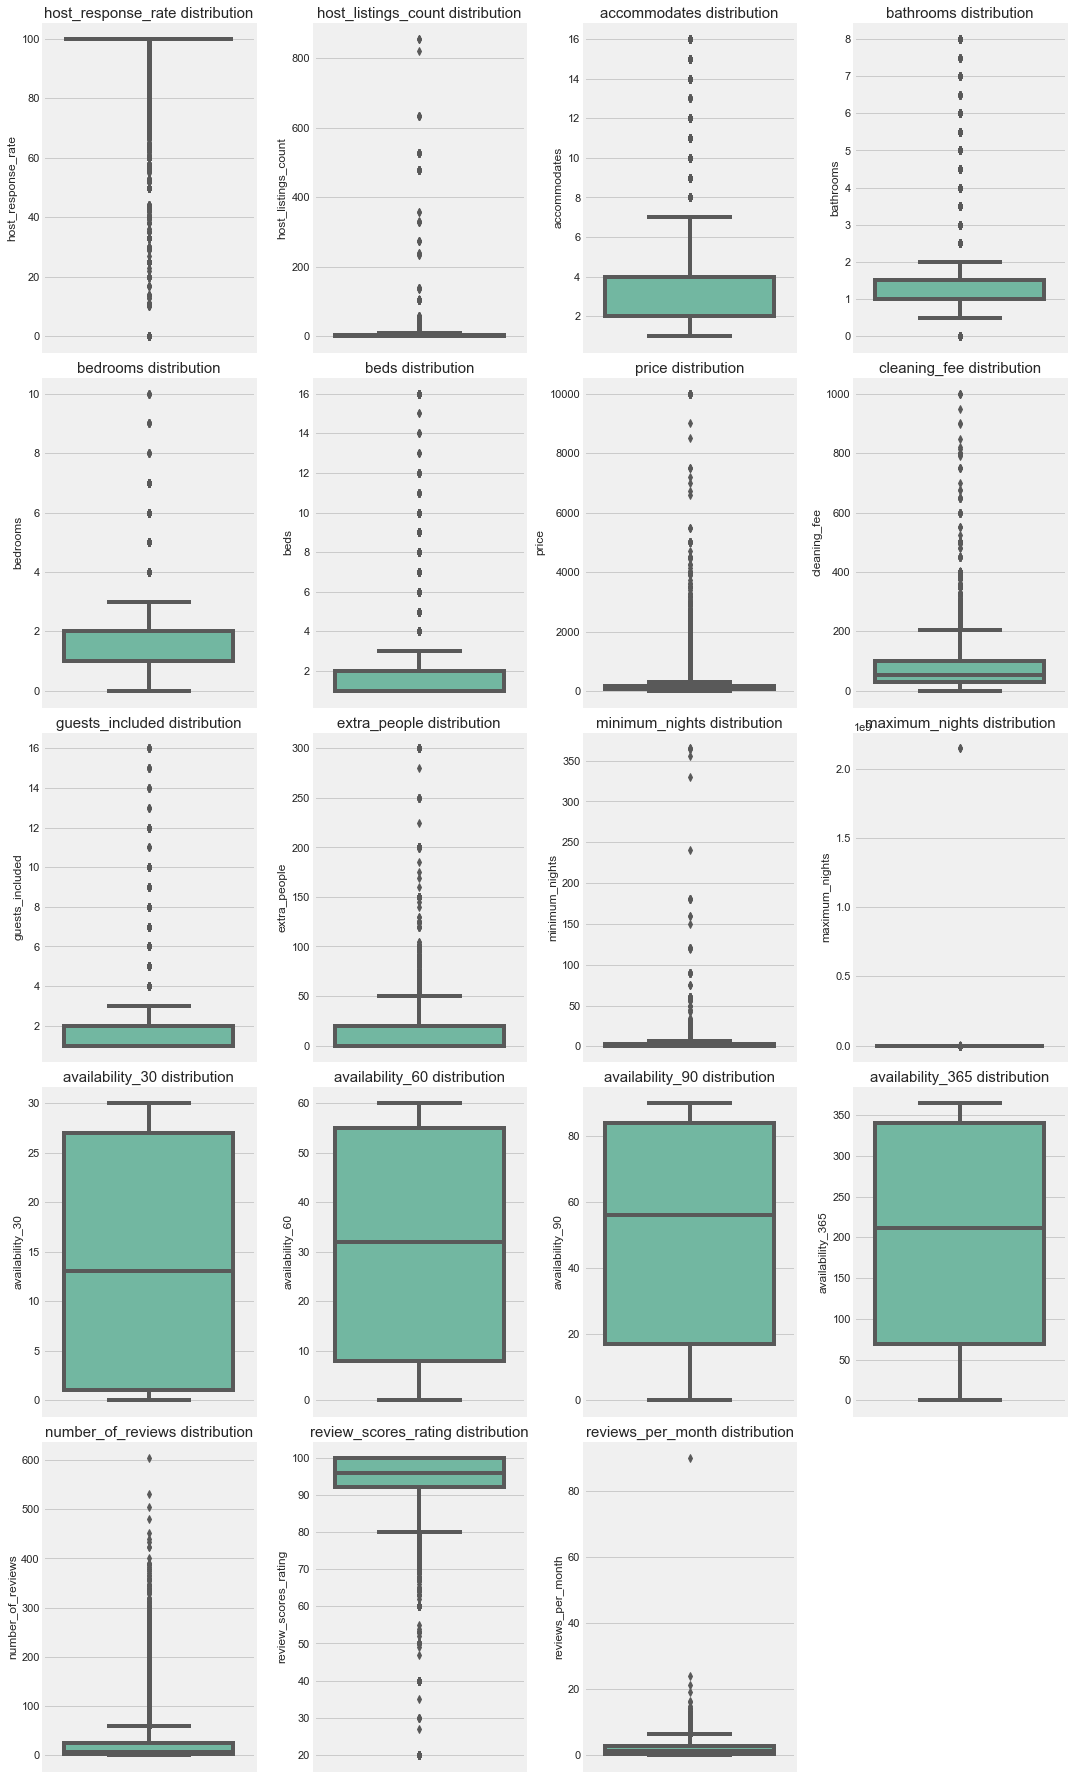

In [12]:
l = num_df.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(15,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.boxplot(num_df[l[i]].dropna(),orient='v', palette="BuGn_r").set_title(f'{l[i]} distribution', fontsize=15)
    plt.tight_layout()

## Target Distribution by Selected Categories

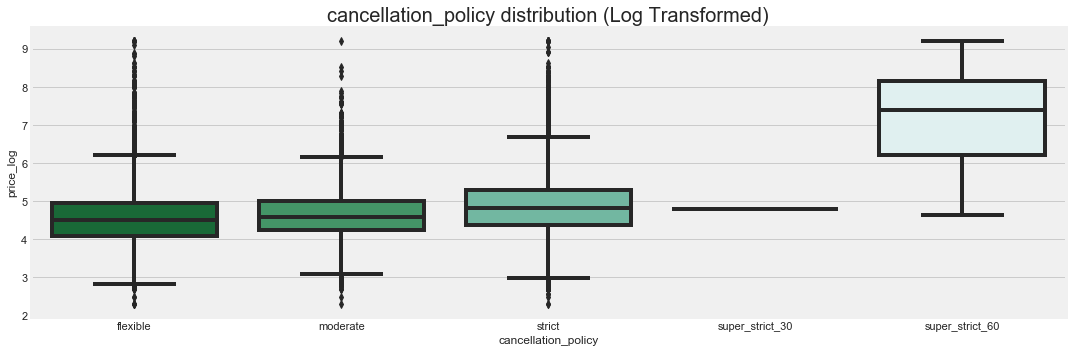

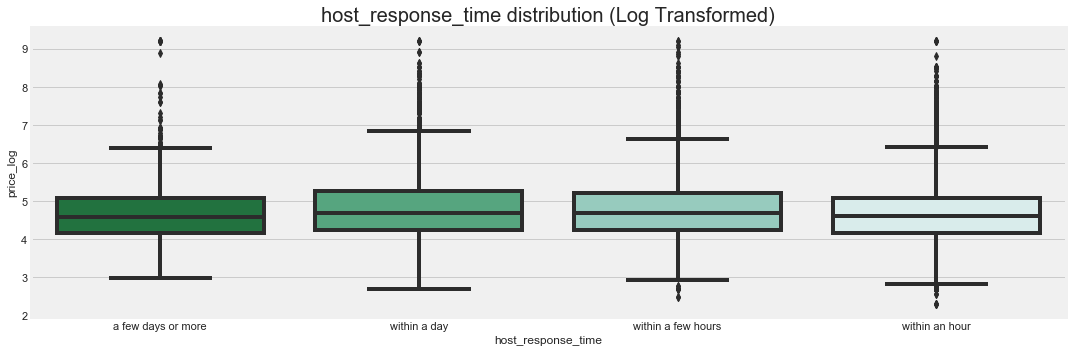

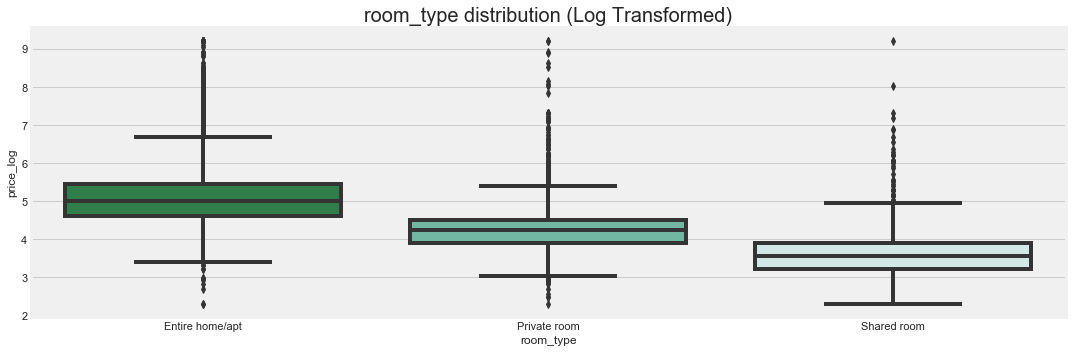

In [13]:
import math

df['price_log'] = df['price'].apply(lambda x: math.log(x))

col = ['cancellation_policy', 'host_response_time', 'room_type']
for c in col:
    f, axes = plt.subplots(figsize=(15, 5))
    sns.boxplot(x=df[c], y=df['price_log'], orient='v',
                palette="BuGn_r").set_title(
                    f"{c} distribution (Log Transformed)", fontsize=20)
    plt.tight_layout()